In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
import decision_tree
import metrics
from multiprocessing import cpu_count
from time import time
from plot_tree import plot_tree

np.random.seed(1234)

<IPython.core.display.Javascript object>

# Import dataset

In [3]:
clean_dataset = np.loadtxt("./data/wifi_db/clean_dataset.txt")
noisy_dataset = np.loadtxt("./data/wifi_db/noisy_dataset.txt")
np.random.shuffle(clean_dataset)
np.random.shuffle(noisy_dataset)

<IPython.core.display.Javascript object>

### Comparing pruned to non pruned tree

Training decision tree
Train accuracy: 1.0
Validation accuracy: 0.985
Test accuracy: 0.965
Leaf count 42


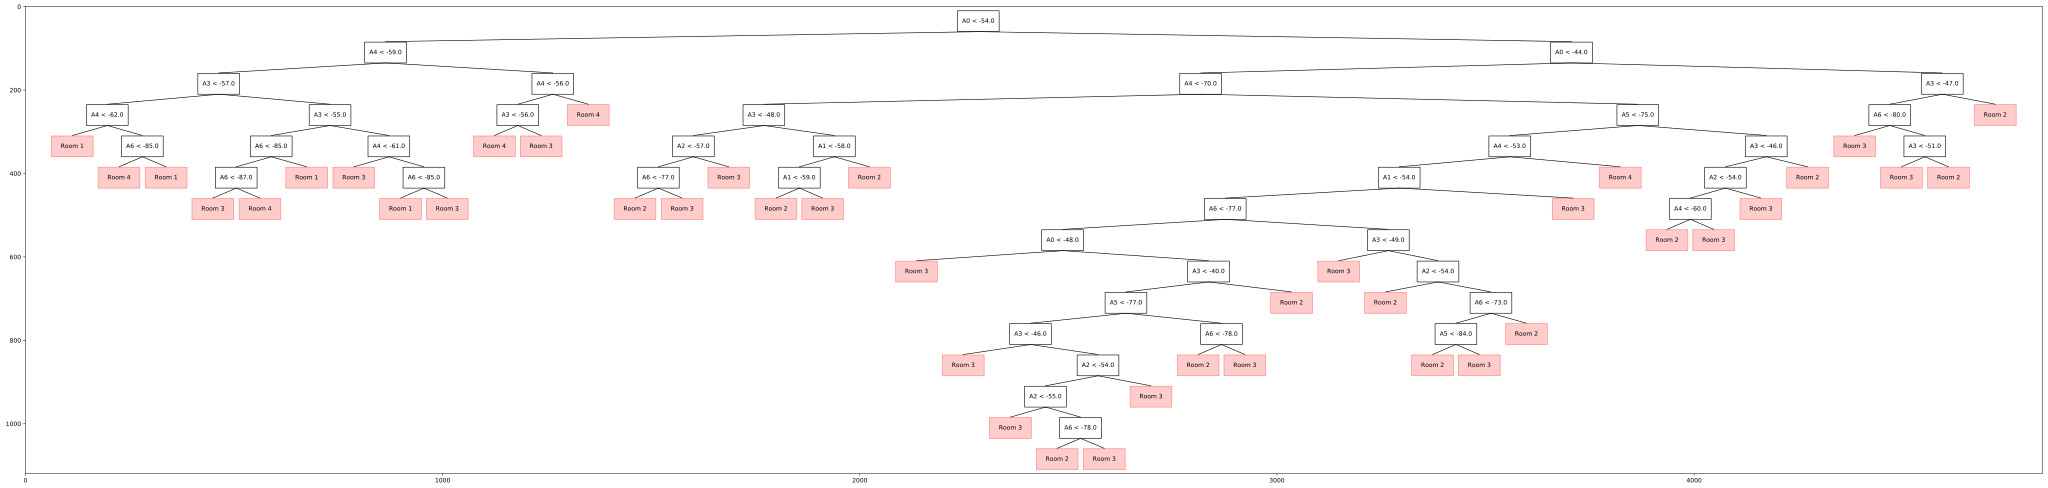


Pruning Tree
Train accuracy: 0.976875
Validation accuracy: 0.99
Test accuracy: 0.98
Leaf count 14


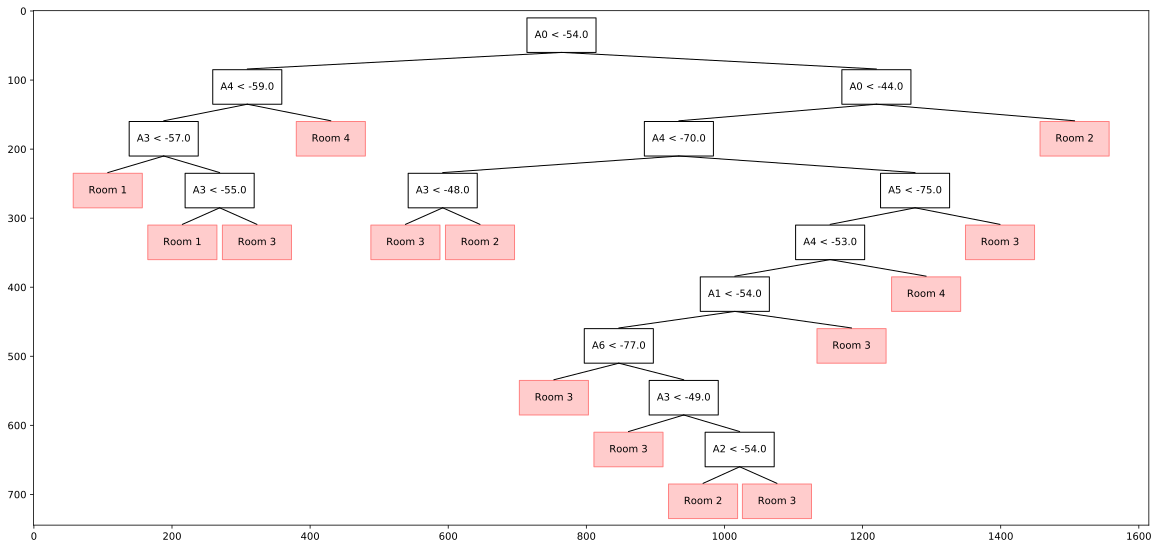

<IPython.core.display.Javascript object>

In [11]:
test_size = 200
validation_size = 200

test_set = clean_dataset[:test_size]
validation_set = clean_dataset[test_size : test_size + validation_size]
training_set = clean_dataset[validation_size + test_size :]

print("Training decision tree")
dec_tree = decision_tree.build_decision_tree(training_set)
print("Train accuracy:", metrics.calc_accuracy(training_set, model=dec_tree))
print("Validation accuracy:", metrics.calc_accuracy(validation_set, model=dec_tree))
print("Test accuracy:", metrics.calc_accuracy(test_set, model=dec_tree))
print("Leaf count", len(dec_tree.get_leaves()))
plot_tree(dec_tree, figsize=(60,16))

print("\nPruning Tree")
pru_tree = decision_tree.prune(validation_set, dec_tree, metrics.calc_accuracy)
print("Train accuracy:", metrics.calc_accuracy(training_set, model=pru_tree))
print("Validation accuracy:", metrics.calc_accuracy(validation_set, model=pru_tree))
print("Test accuracy:", metrics.calc_accuracy(test_set, model=pru_tree))
print("Leaf count", len(pru_tree.get_leaves()))
plot_tree(pru_tree)

### Computation time 

In [5]:
cores_count = range(1, cpu_count() + 1)
elapsed_time_per_core = []
for n_jobs in cores_count:
    print(f"n_jobs = {n_jobs}")
    t1 = time()
    b = decision_tree.build_decision_tree(clean_dataset, n_jobs=n_jobs)
    t2 = time()
    elapsed_time_per_core.append(t2 - t1)
    print("Time:", elapsed_time_per_core[-1])

print("Stats:")
print(f"Tree height:{b.height()}")
for n_jobs, t in zip(cores_count, elapsed_time_per_core):
    print(f"Training time ({n_jobs} processes): {t}")

n_jobs = 1
Time: 0.2872960567474365
n_jobs = 2
Time: 0.26419711112976074
n_jobs = 3
Time: 0.25872802734375
n_jobs = 4
Time: 0.26608896255493164
n_jobs = 5
Time: 0.2547428607940674
n_jobs = 6
Time: 0.24118995666503906
n_jobs = 7
Time: 0.2658500671386719
n_jobs = 8
Time: 0.24795198440551758
n_jobs = 9
Time: 0.25377798080444336
n_jobs = 10
Time: 0.24245023727416992
n_jobs = 11
Time: 0.2548511028289795
n_jobs = 12
Time: 0.27373218536376953
n_jobs = 13
Time: 0.2605130672454834
n_jobs = 14
Time: 0.2670309543609619
n_jobs = 15
Time: 0.27486515045166016
n_jobs = 16
Time: 0.2646350860595703
Stats:
Tree height:15
Training time (1 processes): 0.2872960567474365
Training time (2 processes): 0.26419711112976074
Training time (3 processes): 0.25872802734375
Training time (4 processes): 0.26608896255493164
Training time (5 processes): 0.2547428607940674
Training time (6 processes): 0.24118995666503906
Training time (7 processes): 0.2658500671386719
Training time (8 processes): 0.24795198440551758
Tra

<IPython.core.display.Javascript object>

In [6]:
models, accuracies = decision_tree.train_kfold(clean_dataset, 4, metrics.calc_accuracy)
print(f"K-fold mean accuracy: {np.mean(accuracies)}")

K-fold mean accuracy: 0.9630000000000001


<IPython.core.display.Javascript object>